$$
\Large{\textbf{TP Optimisation - 2023}}
$$

In [39]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Remove noise from a signal

#### Question 1 :

Nous voulons réécrire $f(x) = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2 + \frac{\lambda}{2}\sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$ comme 
$\frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$, où $D \in \mathcal{M}_N(\mathbb{R})$.

Le premier terme est évident, car $\frac{1}{2}|| x - y ||^2 = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2$.
Pour le deuxième terme, en prenant :
\begin{equation}
D = 
\begin{pmatrix}
-1&1&0&0&...&0 \\ 0&-1&1&0&...&0 \\ &&...&...&\\ 0&...&0&-1&1&0 \\ 0&...&0&0&-1&1 \\ 0&0&0&0&0&0
\end{pmatrix},
\end{equation}
On obtient : $||Dx||^2 = \sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$, en prenant $||\cdot||^2$ comme la norme euclidienne usuelle.

In [2]:
def D_mat(N):
    D = np.diag(-1*np.ones(N))
    for i in range(N-1):
        D[i,i+1] = 1
    D[N-1,N-1]=0
    return D

In [3]:
D_mat(5)

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

#### Question  2 :

La fonction $||\cdot||$ est différentiable, donc par somme de fonctions différentiables, $f(x) = \frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$ est bien différentiable.

Calcul du gradient : 

Soit $h \in \mathbb{R}^N$.

\begin{align}
f(x+h) &= \frac{1}{2}||x+h-y||^2+\frac{\lambda}{2}||D(x+h)||^2 \\
&= f(x) + \frac{1}{2} \bigg( \langle x-y,h \rangle + \langle h,x-y \rangle + ||h||^2 \bigg) + \frac{\lambda}{2} \bigg( \langle Dx,Dh\rangle + \langle Dh,Dx \rangle + ||Dh||^2 \bigg) \\
&= f(x) + \langle x-y,h \rangle + \lambda\langle Dx, Dh \rangle + \text{o}(||h||^2), \\
\text{D'où} \,\, f(x+h) &= f(x) + \langle x-y + \lambda D^TDx , h \rangle + \text{o}(||h||^2).
\end{align}

Donc on obtient $\nabla f(x) = x-y+\lambda D^TDx = \big(I_d - D^TD\big)x - y$.

In [4]:
def f(x):
    N = x.shape[0]
    return 1/2*np.linalg.norm(x-y) + lamb/2*np.linalg.norm(D_mat(N)@x)

In [5]:
def grad_f(x):
    N=x.shape[0]
    I = np.eye(N)
    return x + lamb*(D_mat(N).T@D_mat(N))@x - y

#### Question 3 :

In [6]:
N = 100

In [7]:
def generate_signal(N,sigma=0.05):
    
    t = np.linspace(0,1,N)
    t1 = 0.1+0.25*np.random.random()
    t2 = 0.35+0.25*np.random.random()
    yi = np.array([-0.1,0.8,0.2])
    
    y = np.zeros(N)
    
    for i in range(y.size):
        if t[i]<=t1:
            y[i]=yi[0]
        elif t[i]>t1 and t[i]<=t2:
            y[i] = yi[1]
        else:
            y[i] = yi[2]
    
    y += sigma*(2*np.random.random(y.size)-1)
    
    return t,y

In [8]:
t, y = generate_signal(N)

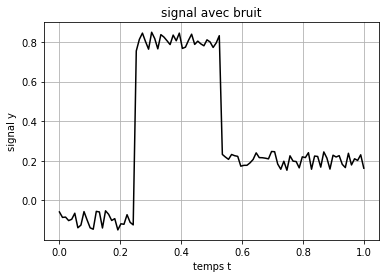

In [9]:
plt.plot(t, y, 'k-')
plt.grid(True)
plt.ylabel('signal y')
plt.xlabel('temps t')
plt.title('signal avec bruit');
plt.show()

#### Question 4 :

In [10]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f(x)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f(x)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

#### Question 5 :

In [11]:
lamb = 1
x0 = y
alpha = 0.2

In [12]:
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

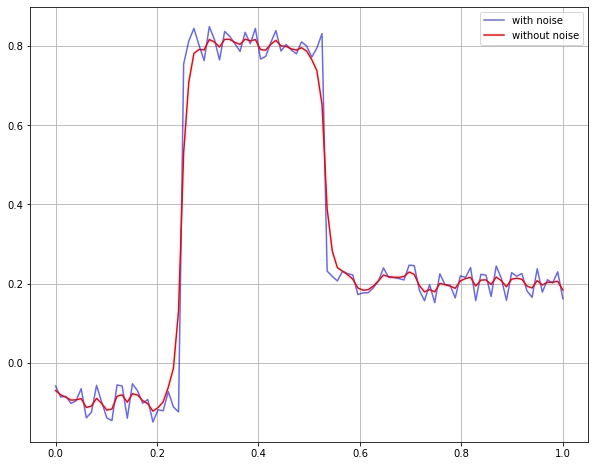

In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.legend()
plt.grid(True)

#### Question 6 :

In [14]:
lamb, alpha = 1, 0.5
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-5, 500)

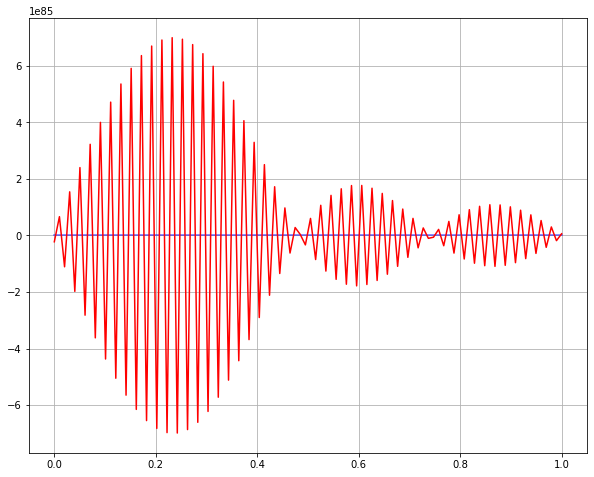

In [15]:
fig = plt.figure(figsize=(10,8))
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.grid(True)

répondre à la question 6

#### Question 7 :

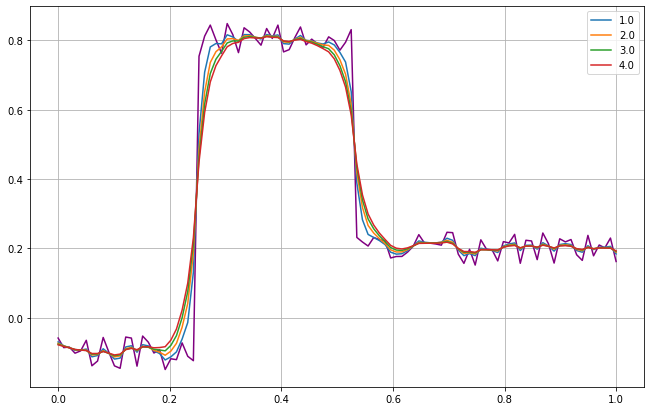

In [16]:
lamb = np.linspace(1,4,4)
alpha = 0.1
fig = plt.figure(figsize = (11,7))
plt.plot(t,y, color = 'purple')
for l in lamb:
    lamb = l
    y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-5, 500)
    plt.plot(t, y_non_noise, label = l)
plt.grid(True)
plt.legend()
plt.show()

Observations : On remarque que plus lambda augmente, moins il y a de bruit.

#### Question 8 :

Pour calculer le gradient de cette nouvelle fonction $f_{\mu}$, nous allons raisonner avec les dérivées partielles, une à une.
Premièrement, ces dérivées partielles existent, (à développer).

Calcul des dérivées partielles:

soit $l \in \{2,...,N-1\}$. Alors :
$$
\frac{\partial f(x)}{\partial x_l} = x_l - y_l - \lambda \frac{x_{l+1} - x_l}{\sqrt{(x_{l+1}-x_l)^2+\mu^2}} + \lambda\frac{x_l-x_{l-1}}{\sqrt{(x_l-x_{l-1})^2+\mu^2}}
$$
Pour $l = N$ :
$$
\frac{\partial f(x)}{\partial x_N} = x_N - y_N + \lambda \frac{x_{N} - x_{N-1}}{\sqrt{(x_{N}-x_{N-1})^2+\mu^2}}
$$
Enfin, pour $l=1$:
$$
\frac{\partial f(x)}{\partial x_1} = x_1 - y_1 - \lambda \frac{x_{2} - x_{1}}{\sqrt{(x_{2}-x_{1})^2+\mu^2}}
$$
Au total, on obtient : 
$$
\nabla f_{\mu}(x) = \bigg(\frac{\partial f(x)}{\partial x_i} \bigg)_{i=1,...,N}.
$$

In [17]:
def grad_f_mu(x, mu):
    
    N = x.shape[0]
    gradf = np.zeros(N)
    
    for i in range(1,N-1):
        gradf[i] = x[i] - y[i] - lamb*(x[i+1]-x[i])/np.sqrt((x[i+1]-x[i])**2 + mu**2) + lamb*(x[i]-x[i-1])/np.sqrt((x[i]-x[i-1])**2 + mu**2)
    
    gradf[0] = x[0] - y[0] - lamb*(x[1]-x[0])/np.sqrt((x[1]-x[0])**2 + mu**2)
    gradf[N-1] = x[N-1] - y[N-1] + lamb*(x[N-1]-x[N-2])/np.sqrt((x[N-1]-x[N-2])**2 + mu**2)
    
    return gradf

#### Question 9 :

In [18]:
def gradient_met_mu(grad_f_mu, x0, mu, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f_mu(x, mu)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f_mu(x, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [19]:
x0 = y
alpha1 = 0.1
alpha2 = 0.001
lamb = 1
y_non_noise, n1, cvg1 = gradient_met(grad_f, x0, alpha1, 1e-8, 500)
y_new, n2, cvg2 = gradient_met_mu(grad_f_mu, x0, 1e-2, alpha2, 1e-5,500)
n1,n2

(142, 500)

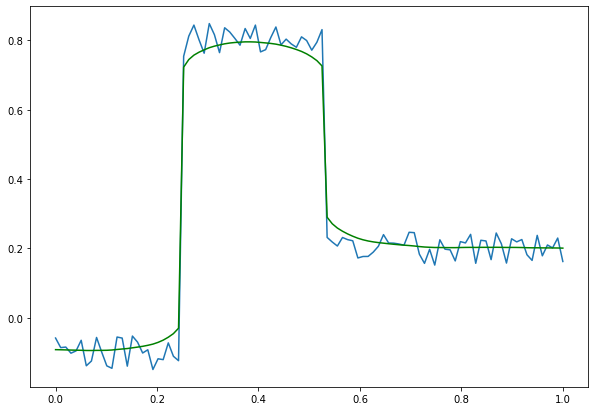

In [20]:
#plt.plot(t,y_non_noise, 'b-')
fig = plt.figure(figsize=(10,7))
plt.plot(t,y)
plt.plot(t,y_new, 'g-')

La deuxième méthode lisse beaucoup plus le signal, mais ne converge pas.

#### Question 10 :

In [21]:
def BBstep(grad_f, x, xm1) :
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization point x_0
    xm1 the initialization point x_-1
    """
    bbs = (x-xm1).T@(grad_f(x)-grad_f(xm1))/np.linalg.norm(grad_f(x)-grad_f(xm1))**2
    
    return bbs # the step in the method of Barzilai-Borwein

In [22]:
def barzilai_borwein(grad_f, x0, eps, Nmax):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    x = x0
    xm1 = -x0
    
    gradf = grad_f(x)
    iters = 0
    alpha = BBstep(grad_f, x, xm1)
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        xm1 = x
        x = xm1 - alpha*grad_f(xm1)
        gradf = grad_f(x)
        alpha = BBstep(grad_f, x, xm1)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    n = iters
    
    return x, n, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [23]:
x0 = y
lamb = 4

y_1, n3, cvg3 = barzilai_borwein(grad_f, x0, 1e-8, 100)
n3, cvg3

(45, True)

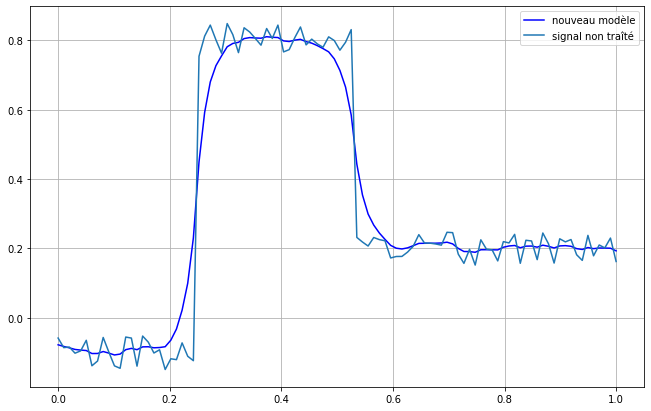

In [24]:
fig = plt.figure(figsize = (11,7))
plt.plot(t,y_1,'b-', label = 'nouveau modèle')
plt.plot(t,y, label = 'signal non traîté')
plt.grid(True)
plt.legend()

On remarque que cette méthode est beaucoup plus efficace que les précédentes, en comparant le nombre d'itérations éxécutées par exemple, et le signal est mieux traîté.

# Exercice 2 : Remove noise from an image

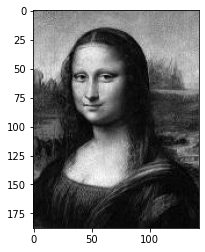

In [148]:
# Pour l'ordi portable

from matplotlib.image import imread
image = imread("C:/Users/emari/Desktop/MASTER_1_SORBONNE/SEMESTRE_2/Grey_Mona_lisa.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

In [41]:
# Pour l'ordi de la maison

from matplotlib.image import imread
image = imread("visual studio opti/Grey_Mona_lisa.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'visual studio opti/Grey_Mona_lisa.jpg'

#### Question 1 :

In [149]:
def delta_x(u): # like the matrix D above, in the first exercise, but for the x direction
    m, n = u.shape[0], u.shape[1]
    delt = -1*np.eye(m)

    for i in range(m-1):
            delt[i,i+1] = 1
    delt[m-1,m-1] = 0
    return delt

In [150]:
def delta_y(u): return delta_x(u.T).T # same as above, but for the y direction, is the transpose of delta_x.

In [151]:
m = g.shape[0]
n = g.shape[1]

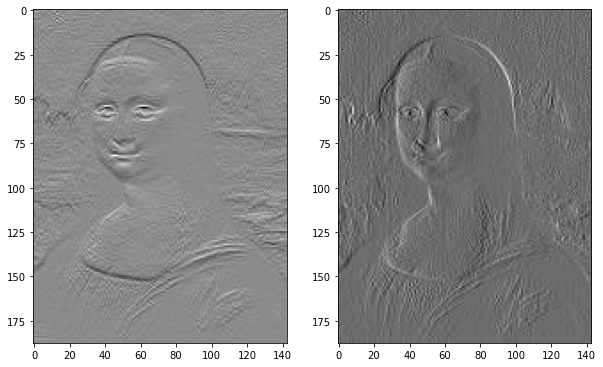

In [152]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,25))
ax1.imshow(delta_x(g)@g,cmap='gray')
ax2.imshow(g@delta_y(g),cmap='gray')

#### Question 2 :

In [153]:
def M_mat(u): return np.sqrt((delta_x(u)@u)**2 + (u@delta_y(u))**2)

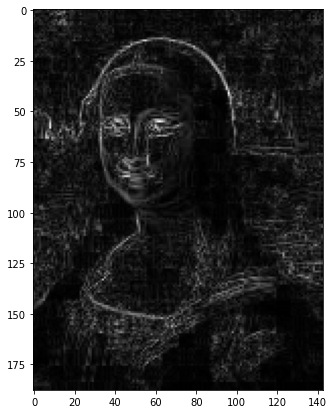

In [154]:
fig = plt.figure(figsize=(12,7))
plt.imshow(M_mat(g), cmap='gray')

##### Remarques :
Après traîtement du dessus, l'image s'affiche en noir et blanc, il n'y a plus de nuances de gris.  

#### Question 3 :

Nous voulons minimiser la fonction $J$ définie comme suit :
$$
J(v) = \frac{1}{2}||v-g||^2 + \frac{\lambda}{2}||\nabla^dv||^2
$$
Calculons d'abord son gradient : 
\begin{align}
\nabla J(v) =& \frac{1}{2} \times 2 (v - g) + \frac{\lambda}{2} \times 2 \times {\nabla^d}^T \nabla^d v \\
=& \, \, \, v - g + \lambda {\nabla^d}^T \nabla^d v,
\end{align}
où $\sqrt{{\nabla^d}^T \nabla^d v}$ est la matrice obtenue à la question 2 appliquée en v, soit la norme du gradient discret.

Pour la descente de gradient, nous allons avoir besoin de $\nabla J$ ainsi que de sa norme $||\nabla J||^2$, pour le critère d'arrêt.

In [155]:
def grad_J(v): # the gradient of the function J
    return  v - g + lamb*(delta_x(v).T@delta_x(v)@v + v@delta_y(v)@delta_y(v).T)

In [191]:
def grad_met_im(grad_J, v0, alpha, eps = 1e-1, Nmax = 500):
    """
    grad_J a function that compute the gradient of J given v, the image. (m,n)-matrix
    v0 the initialization, (m,n)-matrix
    alpha the step (constant)
    """
    v = v0
    gradj = grad_J(v)
    iters = 0

    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        v = v - alpha*gradj
        gradj = grad_J(v)
        iters += 1
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence

    return v, iters, cvg
    

In [198]:
lambdaa = np.arange(0.1,6)
v0 = np.zeros((m,n))

lamb=lambdaa[0]
g_new1, it, cvg = grad_met_im(grad_J, v0, 0.01)
lamb = lambdaa[1]
g_new2, it, cvg = grad_met_im(grad_J, v0, 0.01)
lamb=lambdaa[2]
g_new3, it, cvg = grad_met_im(grad_J, v0, 0.01)
lamb=lambdaa[3]
g_new4, it, cvg = grad_met_im(grad_J, v0, 0.01)
lamb=lambdaa[4]
g_new5, it, cvg = grad_met_im(grad_J, v0, 0.01)
lamb=lambdaa[5]
g_new6, it, cvg = grad_met_im(grad_J, v0, 0.01)

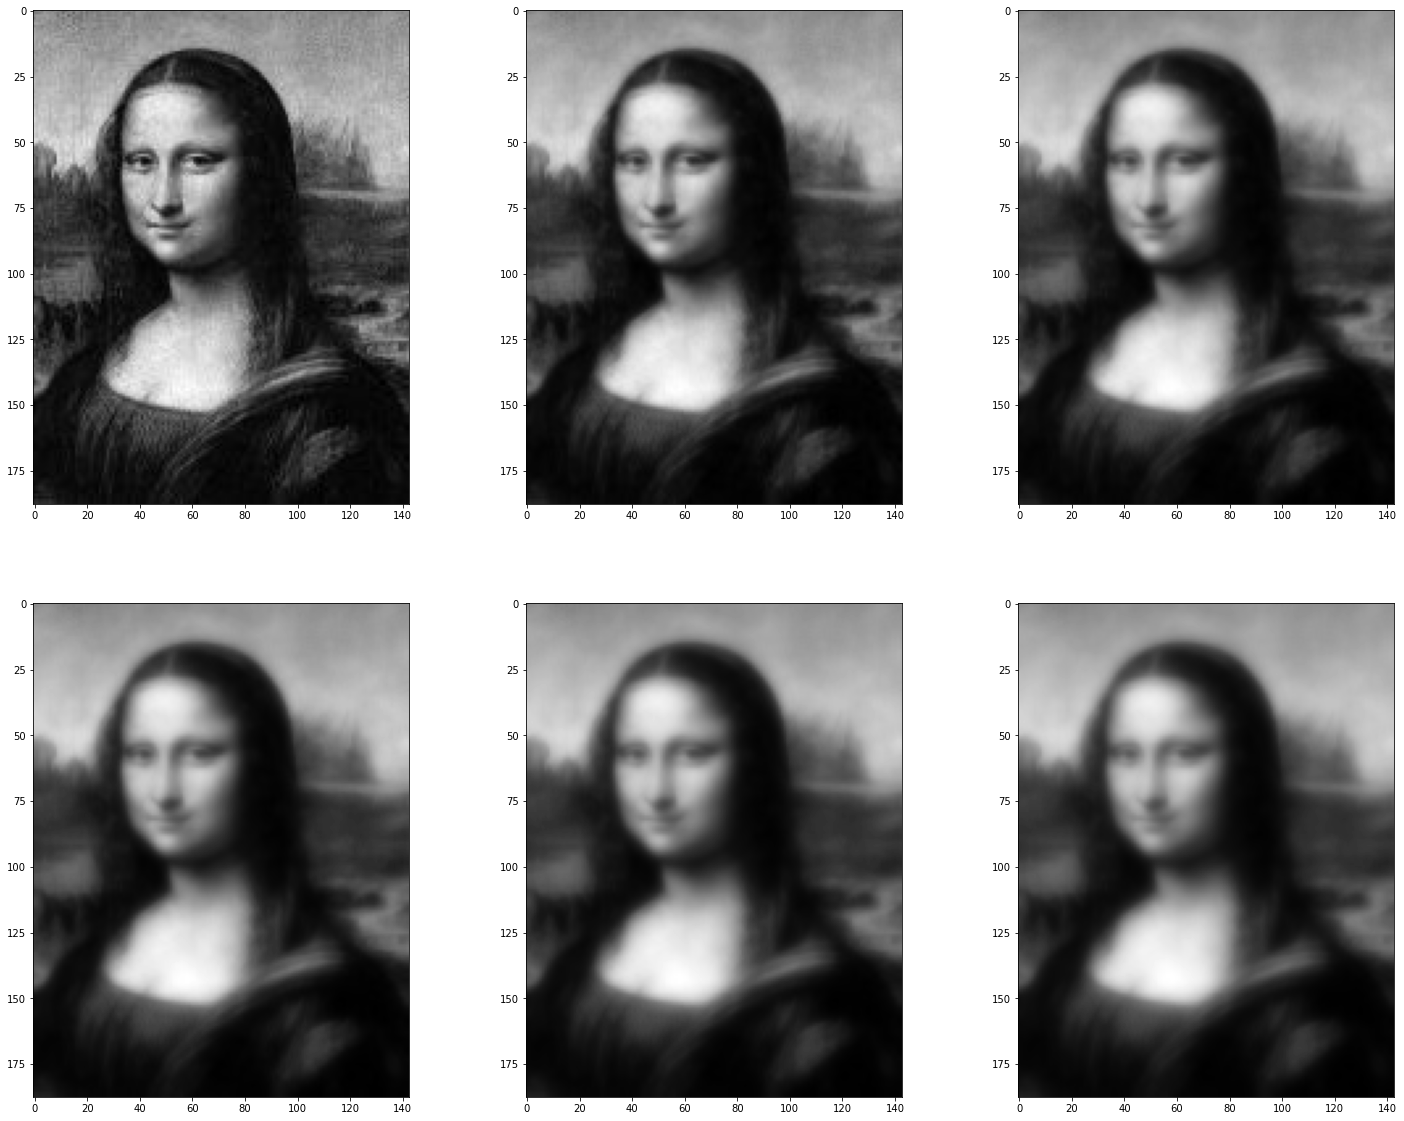

In [201]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2,figsize=(25,20))


ax1.imshow(g_new1, cmap='gray')
ax2.imshow(g_new2, cmap='gray')
ax3.imshow(g_new3, cmap='gray')
ax4.imshow(g_new4, cmap='gray')
ax5.imshow(g_new5, cmap='gray')
ax6.imshow(g_new6, cmap='gray')

#### Remarques :

Précisons que $\alpha$ et $\lambda$ sont liés. A $\alpha$ fixé à $0.01$, lorsque l'on augmente $\lambda$, l'image devient de plus en plus lisse, ce qui la rend visuellement flou, mais elle n'est plus pixelisée.

#### Question 4 :

Modélisation du problème:

Nous allons considérer $||\nabla^d v||^2 = \big|\big| ||(\delta_x v ,\delta_y v)||\big|\big|^2 = \big|\big|\sqrt{(\delta_x v)^2 + (\delta_y v)^2}\big|\big|^2 = \sum_{i,j} \sqrt{(\delta_x v)^2 + (\delta_y v)^2}$.

En considérant $\delta_x v$ et $\delta_y v$ comme définis dans l'énoncé, on obtient : 
$$
||\nabla^d v||^2 = \sum_{i,j} \sqrt{(v_{i+1,j} - v_{i,j})^2 + (v_{i,j+1}-v_{i,j})^2} \, , \forall \, \, \, (i,j) \ne (n,m).
$$

On peut donc définir avec cette définission une nouvelle fonction $J_{\mu}(v) = \frac{1}{2} || v-g|| + \frac{\lambda}{2} \big|\big| ||(\delta_x v ,\delta_y v, \mu)||\big|\big|^2$, 

avec $\big|\big| ||(\delta_x v ,\delta_y v, \mu)||\big|\big|^2 = \big|\big|\sqrt{(\delta_x v)^2 + (\delta_y v)^2 + \mu^2}\big|\big|^2 $.

Pour calculer le gradient, raisonnons avec les dérivées partielles:

Soit $l \in \{1,...,m-1\}, \, k \in \{1,...,n-1\}$:
$$
\frac{\partial J_{\mu}(u)}{\partial u_{l,k}} = u_{l,k} - g_{l,k} + \lambda \frac{2 u_{l,k} - u_{l+1,k} - u_{l,k+1}}{\sqrt{(u_{l+1,k}-u_{l,k})^2 + (u_{l,k+1}-u{l,k})^2 + \mu^2}}
$$

Soit $k=n, \, \, l \ne m$:
$$
\frac{\partial J_{\mu}(u)}{\partial u_{l,n}} = u_{l,n} - g_{l,n} + \lambda \frac{u_{l,n} - u_{l+1,n}}{\sqrt{(u_{l+1,n}-u_{l,n})^2 + \mu^2}}
$$

Soit $l = m , \, \, k\ne n$:
$$
\frac{\partial J_{\mu}(u)}{\partial u_{m,k}} = u_{m,k} - g_{m,k} + \lambda \frac{u_{m,k} - u_{m,k+1}}{\sqrt{(u_{m,k+1}-u_{m,k})^2 + \mu^2}}
$$

Enfin, pour $(l,k)=(m,n)$:
$$
\frac{\partial J_{\mu}(u)}{\partial u_{m,n}} = u_{m,n} - g_{m,n}
$$